In [ ]:
# STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# STEP 2: Install dependencies
!pip install pandas matplotlib seaborn pillow tqdm

Mounted at /content/drive


📄 Walking through report directory...
✅ Found 52434 reports.
🖼️ Walking through image directory...


100%|██████████| 67445/67445 [00:00<00:00, 120458.23it/s]


✅ Total matched image-report pairs: 86565


,study_id,image_path,report_path
0,s53113454,/content/drive/MyDrive/mimic_data/mimic-cxr-da...,/content/drive/MyDrive/mimic_data/mimic-cxr-da...
1,s53113454,/content/drive/MyDrive/mimic_data/mimic-cxr-da...,/content/drive/MyDrive/mimic_data/mimic-cxr-da...
2,s50117879,/content/drive/MyDrive/mimic_data/mimic-cxr-da...,/content/drive/MyDrive/mimic_data/mimic-cxr-da...
3,s50117879,/content/drive/MyDrive/mimic_data/mimic-cxr-da...,/content/drive/MyDrive/mimic_data/mimic-cxr-da...
4,s53917996,/content/drive/MyDrive/mimic_data/mimic-cxr-da...,/content/drive/MyDrive/mimic_data/mimic-cxr-da...


/tmp/ipython-input-6-276255486.py:56: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


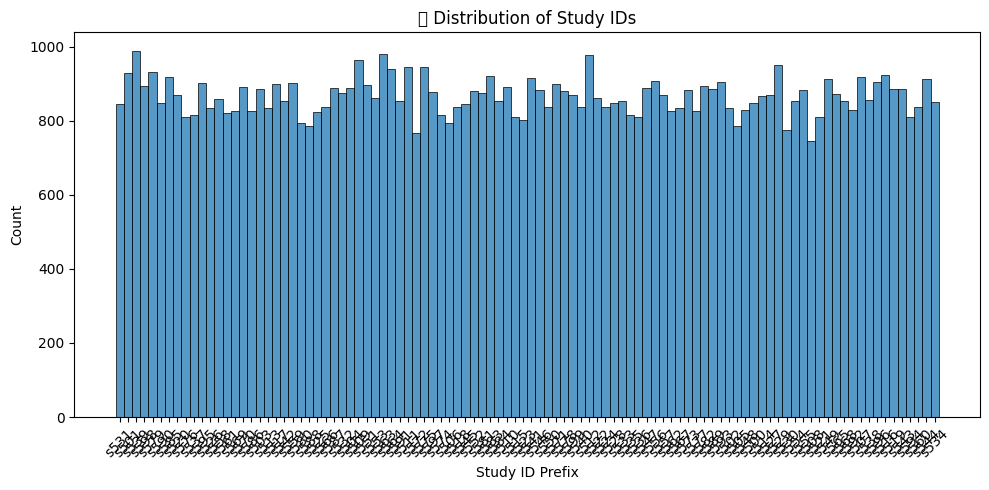

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
import seaborn as sns

# Define paths
image_base = '/content/drive/MyDrive/mimic_data/mimic-cxr-dataset/official_data_iccv_final/files'
report_base = '/content/drive/MyDrive/mimic_data/mimic-cxr-dataset/mimic-cxr-reports/files'

# Step 1: Build dict of reports based on filename (e.g. s53831955.txt -> full path)
print("📄 Walking through report directory...")
report_dict = {}
for root, dirs, files in os.walk(report_base):
    for file in files:
        if file.endswith('.txt'):
            report_id = os.path.splitext(file)[0]
            full_path = os.path.join(root, file)
            report_dict[report_id] = full_path

print(f"✅ Found {len(report_dict)} reports.")

# Step 2: Walk image directory and match using parent folder name
print("🖼️ Walking through image directory...")
data = []

for root, dirs, files in tqdm(list(os.walk(image_base))):
    for file in files:
        if file.endswith('.jpg'):
            image_path = os.path.join(root, file)

            # Get study_id from parent folder name
            study_id = os.path.basename(os.path.dirname(image_path))

            # Match with report
            if study_id in report_dict:
                data.append({
                    'study_id': study_id,
                    'image_path': image_path,
                    'report_path': report_dict[study_id]
                })

# Step 3: Create DataFrame
df = pd.DataFrame(data)
print(f"✅ Total matched image-report pairs: {len(df)}")
display(df.head())

# Optional: Plot image distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['study_id'].astype(str).str[:4], bins=30)
plt.title("📊 Distribution of Study IDs")
plt.xlabel("Study ID Prefix")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df.to_csv('/content/drive/MyDrive/matched_image_report_pairs.csv', index=False)
print("✅ Saved CSV.")


✅ Saved CSV.


🖼️ Image Path: /content/drive/MyDrive/mimic_data/mimic-cxr-dataset/official_data_iccv_final/files/p15/p15034985/s51243963/6a138fd5-e874c03e-b4cdb222-e0c8e03a-895d5d61.jpg


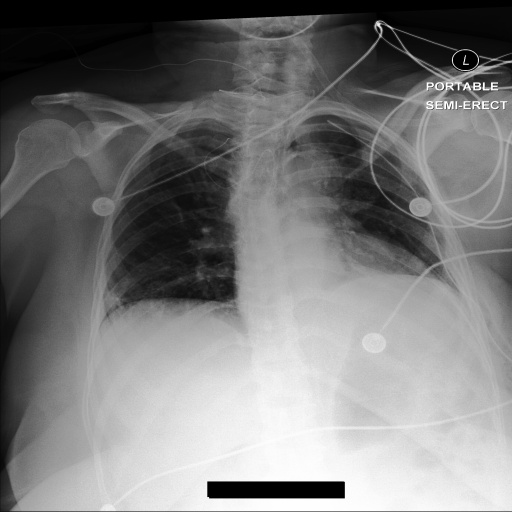


📄 Report (/content/drive/MyDrive/mimic_data/mimic-cxr-dataset/mimic-cxr-reports/files/p15/p15034985/s51243963.txt):

                                 FINAL REPORT
 EXAMINATION:  CHEST (PORTABLE AP)
 
 INDICATION:  ___ year old woman with LLL lung cancer s/p lobectomy  // eval
 post op change      eval post op change
 
 IMPRESSION: 
 
 In comparison with the study of ___, there is now a left chest
 tube in place following surgery. No definite evidence of pneumothorax. Small
 amount of subcutaneous gas is seen along the left lateral chest wall.
 There are low lung volumes with mild basilar atelectatic changes. No evidence
 of acute focal pneumonia.



In [ ]:
from IPython.display import display

sample = df.sample(1).iloc[0]
img = Image.open(sample['image_path'])

print(f"🖼️ Image Path: {sample['image_path']}")
display(img)

print(f"\n📄 Report ({sample['report_path']}):\n")
with open(sample['report_path'], 'r') as f:
    print(f.read())


✅ Loaded Data
Total pairs: 86565
    study_id                                         image_path  \
0  s53113454  /content/drive/MyDrive/mimic_data/mimic-cxr-da...   
1  s53113454  /content/drive/MyDrive/mimic_data/mimic-cxr-da...   
2  s50117879  /content/drive/MyDrive/mimic_data/mimic-cxr-da...   
3  s50117879  /content/drive/MyDrive/mimic_data/mimic-cxr-da...   
4  s53917996  /content/drive/MyDrive/mimic_data/mimic-cxr-da...   

                                         report_path  
0  /content/drive/MyDrive/mimic_data/mimic-cxr-da...  
1  /content/drive/MyDrive/mimic_data/mimic-cxr-da...  
2  /content/drive/MyDrive/mimic_data/mimic-cxr-da...  
3  /content/drive/MyDrive/mimic_data/mimic-cxr-da...  
4  /content/drive/MyDrive/mimic_data/mimic-cxr-da...  

📊 Unique study IDs: 52434
🖼️ Sample image path: /content/drive/MyDrive/mimic_data/mimic-cxr-dataset/official_data_iccv_final/files/p10/p10344913/s53113454/af29e14f-8db79fed-cdcbd6a9-feb8b6b2-286edab2.jpg
📄 Sample report path: /conten

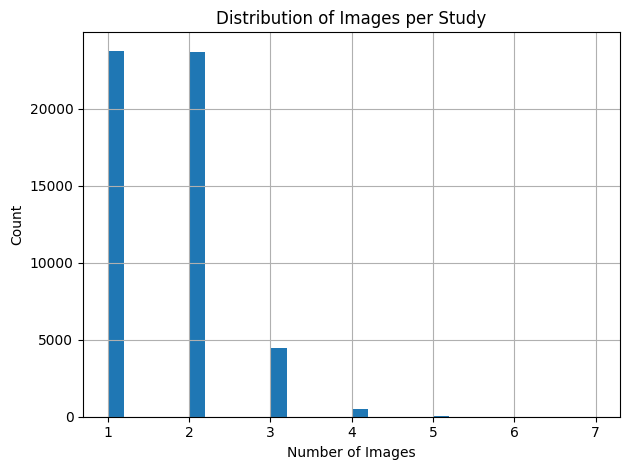


📐 Getting image sizes (sample only)
                                              image_path  image_size
57644  /content/drive/MyDrive/mimic_data/mimic-cxr-da...  (512, 512)
70068  /content/drive/MyDrive/mimic_data/mimic-cxr-da...  (512, 512)
84546  /content/drive/MyDrive/mimic_data/mimic-cxr-da...  (512, 512)
53643  /content/drive/MyDrive/mimic_data/mimic-cxr-da...  (512, 512)
86143  /content/drive/MyDrive/mimic_data/mimic-cxr-da...  (512, 512)

📝 Sample Reports:

[0] FINAL REPORT
 HISTORY:  Seizures status post intubation.
 
 TECHNIQUE:  Supine AP view of the chest.
 
 COMPARISON:  None.
 
 FINDINGS:
 
 Endotracheal tube tip is slightly low lying measuring approximately 2.9 cm
 from the carina.  An orogastric tube tip is within the stomach as is the side
 port. ...

[1] FINAL REPORT
 INDICATION:   ___M with cough  // infiltrate
 
 TECHNIQUE:  PA and lateral views the chest.
 
 COMPARISON:  ___.
 
 FINDINGS: 
 
 The lungs are clear.  There is no consolidation, effusion, or edema.  Th

In [ ]:
# STEP 1: Install necessary packages
!pip install pandas matplotlib seaborn pillow tqdm --quiet

# STEP 2: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
import numpy as np
from tqdm import tqdm

# STEP 3: Load the matched image-report pairs CSV
csv_path = '/content/drive/MyDrive/matched_image_report_pairs.csv'
df = pd.read_csv(csv_path)

# STEP 4: Show basic info
print("✅ Loaded Data")
print("Total pairs:", len(df))
print(df.head())

# STEP 5: Basic EDA
print("\n📊 Unique study IDs:", df['study_id'].nunique())
print("🖼️ Sample image path:", df['image_path'].iloc[0])
print("📄 Sample report path:", df['report_path'].iloc[0])

# Visualize distribution of number of images per study
df['study_id'].value_counts().hist(bins=30)
plt.title("Distribution of Images per Study")
plt.xlabel("Number of Images")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

# STEP 6: Function to read image size
def get_image_size(image_path):
    try:
        with Image.open(image_path) as img:
            return img.size  # (width, height)
    except:
        return (None, None)

# Apply image size extraction (optional, slow for large data)
print("\n📐 Getting image sizes (sample only)")
df_sample = df.sample(100)  # smaller subset for faster demo
df_sample['image_size'] = df_sample['image_path'].apply(get_image_size)
print(df_sample[['image_path', 'image_size']].head())

# STEP 7: Function to load report text
def load_report(report_path):
    try:
        with open(report_path, 'r') as f:
            return f.read().strip()
    except:
        return ""

# Apply to small sample (for performance)
df_sample['report_text'] = df_sample['report_path'].apply(load_report)
print("\n📝 Sample Reports:\n")
for i in range(3):
    print(f"[{i}] {df_sample['report_text'].iloc[i][:300]}...\n")

# ✅ Preprocessing function (basic)
def preprocess_report(text):
    text = text.lower()
    text = text.replace('\n', ' ')
    text = text.strip()
    return text

df_sample['report_clean'] = df_sample['report_text'].apply(preprocess_report)

print("\n✅ Preprocessing Done on Sample. Ready for full pipeline.")


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 📥 Load the cleaned dataset
df = pd.read_csv('/content/drive/MyDrive/cleaned_mimic_image_report_pairs.csv')

# 🔍 Get unique study IDs
unique_studies = df['study_id'].unique()

# 📊 Split into Train (80%), Validation (10%), Test (10%)
train_studies, temp_studies = train_test_split(
    unique_studies, test_size=0.2, random_state=42
)
val_studies, test_studies = train_test_split(
    temp_studies, test_size=0.5, random_state=42
)

# 🧠 Function to assign split based on study_id
def assign_split(study_id):
    if study_id in train_studies:
        return 'train'
    elif study_id in val_studies:
        return 'val'
    else:
        return 'test'

# 🏷️ Apply split labels
df['split'] = df['study_id'].apply(assign_split)

# 💾 Save split dataset
output_path = '/content/drive/MyDrive/mimic_split_image_report_data.csv'
df.to_csv(output_path, index=False)

# ✅ Confirmation
print("✅ Dataset split complete!")
print(df['split'].value_counts())
print(f"📁 Saved to: {output_path}")


✅ Dataset split complete!
split
train    69255
test      8699
val       8611
Name: count, dtype: int64
📁 Saved to: /content/drive/MyDrive/mimic_split_image_report_data.csv


In [ ]:
!pip install torch torchvision transformers datasets nltk


In [ ]:
!pip install torch torchvision transformers nltk --quiet


In [ ]:
import os
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from torchvision.models import resnet50
from PIL import Image
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
class Vocabulary:
    def __init__(self, freq_threshold=5):
        self.freq_threshold = freq_threshold
        self.itos = {0: "<PAD>", 1: "<START>", 2: "<END>", 3: "<UNK>"}
        self.stoi = {v: k for k, v in self.itos.items()}

    def build_vocab(self, sentences):
        frequencies = {}
        idx = 4
        for sentence in sentences:
            for word in word_tokenize(sentence.lower()):
                frequencies[word] = frequencies.get(word, 0) + 1
                if frequencies[word] == self.freq_threshold:
                    self.stoi[word] = idx
                    self.itos[idx] = word
                    idx += 1

    def numericalize(self, text):
        return [
            self.stoi.get(word, self.stoi["<UNK>"])
            for word in word_tokenize(text.lower())
        ]


In [ ]:
class MimicDataset(Dataset):
    def __init__(self, df, vocab, transform=None):
        self.df = df.reset_index(drop=True)
        self.vocab = vocab
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img = Image.open(row.image_path).convert("RGB")
        if self.transform:
            img = self.transform(img)

        tokens = [self.vocab.stoi["<START>"]] + \
                 self.vocab.numericalize(row.report) + \
                 [self.vocab.stoi["<END>"]]

        return img, torch.tensor(tokens)


In [ ]:
from torch.nn.utils.rnn import pad_sequence

class Collate:
    def __init__(self, pad_idx):
        self.pad_idx = pad_idx

    def __call__(self, batch):
        imgs, captions = zip(*batch)
        imgs = torch.stack(imgs)
        captions = pad_sequence(captions, batch_first=True, padding_value=self.pad_idx)
        return imgs, captions


In [ ]:
class EncoderCNN(nn.Module):
    def __init__(self, embed_size):
        super().__init__()
        resnet = resnet50(pretrained=True)
        modules = list(resnet.children())[:-1]
        self.resnet = nn.Sequential(*modules)
        self.linear = nn.Linear(resnet.fc.in_features, embed_size)
        self.bn = nn.BatchNorm1d(embed_size)

    def forward(self, images):
        with torch.no_grad():
            features = self.resnet(images).squeeze()
        return self.bn(self.linear(features))

class DecoderRNN(nn.Module):
    def __init__(self, embed_size, hidden_size, vocab_size, num_layers=1):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, vocab_size)

    def forward(self, features, captions):
        embeddings = self.embed(captions[:, :-1])
        inputs = torch.cat((features.unsqueeze(1), embeddings), 1)
        hiddens, _ = self.lstm(inputs)
        return self.linear(hiddens)


In [ ]:
def get_loaders(df, vocab, batch_size=64):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ])
    train_set = MimicDataset(df[df.split == 'train'], vocab, transform)
    val_set = MimicDataset(df[df.split == 'val'], vocab, transform)

    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True,
                              collate_fn=Collate(pad_idx=vocab.stoi["<PAD>"]))
    val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False,
                            collate_fn=Collate(pad_idx=vocab.stoi["<PAD>"]))
    return train_loader, val_loader


In [ ]:
print(df.columns)


Index(['study_id', 'image_path', 'report_path', 'report_text', 'split'], dtype='object')


In [ ]:
# STEP: Install required libraries
!pip install transformers -q

# STEP: Imports
import pandas as pd
from transformers import AutoTokenizer
from tqdm import tqdm

# STEP: Load Cleaned Metadata
csv_path = '/content/drive/MyDrive/mimic_split_image_report_data.csv'

df = pd.read_csv(csv_path)

print("✅ Loaded cleaned metadata")
print(df.columns)

# STEP: Load Tokenizer (e.g., Bio_ClinicalBERT)
tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")

# STEP: Tokenize Reports
tqdm.pandas()

# Tokenization Function
def tokenize_text(text):
    return tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=512,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt'
    )

# Apply Tokenization
print("🔄 Tokenizing reports...")
df['tokenized'] = df['report_text'].progress_apply(tokenize_text)

# STEP: Example Output
print("✅ Tokenization complete.\nSample:")
print(df[['report_text', 'tokenized']].iloc[0])


✅ Loaded cleaned metadata
Index(['study_id', 'image_path', 'report_path', 'report_text', 'split'], dtype='object')


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

🔄 Tokenizing reports...


100%|██████████| 86565/86565 [01:45<00:00, 817.15it/s] 

✅ Tokenization complete.
Sample:
report_text    final report examination: chest (pa and lat)  ...
tokenized            [input_ids, token_type_ids, attention_mask]
Name: 0, dtype: object


In [ ]:
!pip install torchvision


In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import ast

# Define image preprocessing
image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Dataset class
class MIMICDataset(Dataset):
    def __init__(self, dataframe, tokenizer, split='train'):
        self.data = dataframe[dataframe['split'] == split].reset_index(drop=True)
        self.tokenizer = tokenizer
        self.transform = image_transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]

        # Load image
        image = Image.open(row['image_path']).convert('RGB')
        image = self.transform(image)

        # Tokenized report
        tokenized = ast.literal_eval(row['tokenized'])  # stored as stringified dict
        input_ids = torch.tensor(tokenized['input_ids'][:128])  # truncate long ones

        return image, input_ids


In [ ]:
class ImageCaptioningModel(nn.Module):
    def __init__(self, embed_size=256, hidden_size=512, vocab_size=30522):  # BERT vocab
        super(ImageCaptioningModel, self).__init__()
        resnet = models.resnet50(pretrained=True)
        for param in resnet.parameters():
            param.requires_grad = False
        self.encoder = nn.Sequential(*list(resnet.children())[:-1])  # remove FC
        self.linear = nn.Linear(resnet.fc.in_features, embed_size)

        self.embed = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, batch_first=True)
        self.fc_out = nn.Linear(hidden_size, vocab_size)

    def forward(self, images, captions):
        features = self.encoder(images).squeeze()  # (batch, 2048)
        features = self.linear(features).unsqueeze(1)  # (batch, 1, embed)

        embeddings = self.embed(captions[:, :-1])  # shift
        lstm_input = torch.cat((features, embeddings), 1)
        hiddens, _ = self.lstm(lstm_input)
        outputs = self.fc_out(hiddens)

        return outputs


In [ ]:
from transformers import BertTokenizer

# Load tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Create Datasets and Loaders
train_ds = MIMICDataset(df, tokenizer, split='train')
val_ds = MIMICDataset(df, tokenizer, split='val')

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=16)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
import torch.optim as optim
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🖥️ Using device: {device}")

# Model instantiation
vocab_size = tokenizer.vocab_size
model = ImageCaptioningModel(vocab_size=vocab_size).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss(ignore_index=tokenizer.pad_token_id)
optimizer = optim.Adam(model.parameters(), lr=1e-4)


🖥️ Using device: cpu


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 53.7MB/s]


In [ ]:
def evaluate(model, val_loader):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for images, captions in val_loader:
            images, captions = images.to(device), captions.to(device)
            outputs = model(images, captions)
            loss = criterion(outputs.view(-1, vocab_size), captions[:, 1:].reshape(-1))
            total_loss += loss.item()
    return total_loss / len(val_loader)


In [ ]:
from torch.optim import AdamW


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.optim import AdamW
from tqdm import tqdm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

# Set your project folder path inside Google Drive
project_path = '/content/drive/MyDrive/bert_sentiment_project'

# Create the directory if it doesn't exist
os.makedirs(project_path, exist_ok=True)

# Move into this directory
os.chdir(project_path)

print("Working directory set to:", os.getcwd())


Working directory set to: /content/drive/MyDrive/bert_sentiment_project


In [ ]:
!pip install transformers datasets -q


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load tokenizer and model from Hugging Face hub
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)  # For binary classification


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/mimic_split_image_report_data.csv')

# 👇 Show the column names
print(df.columns)


Index(['study_id', 'image_path', 'report_path', 'report_text', 'split'], dtype='object')


In [ ]:
import pandas as pd

# 📂 Load split dataset
df = pd.read_csv('/content/drive/MyDrive/mimic_split_image_report_data.csv')

# 🧪 Extract training texts and dummy labels
train_df = df[df['split'] == 'train']
texts = train_df['report_text'].tolist()
labels = [0] * len(texts)  # 🟡 Temporary placeholder labels (to be replaced with actual)

print(f"Loaded {len(texts)} training samples.")


Loaded 69255 training samples.


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer

# 🔤 Load BERT tokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

# 🧱 Custom dataset class
class ReportDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(
            self.texts[idx],
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'token_type_ids': encoding['token_type_ids'].squeeze(0) if 'token_type_ids' in encoding else torch.zeros(self.max_length, dtype=torch.long),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long)
        }

# 🧪 Create dataset and dataloader
dataset = ReportDataset(texts, labels, tokenizer)
train_loader = DataLoader(dataset, batch_size=8, shuffle=True)

print("✅ Tokenization and DataLoader ready.")


✅ Tokenization and DataLoader ready.


In [ ]:
import pandas as pd
import torch
from transformers import AutoTokenizer
from torch.utils.data import DataLoader
from tqdm import tqdm

# ✅ Step 1: Load your data
df = pd.read_csv('/content/drive/MyDrive/mimic_split_image_report_data.csv')
print(f"✅ Loaded {len(df)} records")

# ✅ Step 2: Clean the text
df['report_clean'] = df['report_text'].fillna('').str.lower().str.replace('\n', ' ').str.strip()

# ✅ Step 3: Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")

# ✅ Step 4: Setup GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"⚙️ Using device: {device}")

# ✅ Step 5: Tokenization function (batched)
BATCH_SIZE = 64

def batch_tokenize(text_list):
    encoded = tokenizer.batch_encode_plus(
        text_list,
        add_special_tokens=True,
        max_length=512,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt'
    )
    return encoded

# ✅ Step 6: Run in batches and collect results
all_input_ids = []
all_attention_masks = []

dataloader = DataLoader(df['report_clean'].tolist(), batch_size=BATCH_SIZE)

for batch in tqdm(dataloader, desc="🔄 Tokenizing"):
    tokenized = batch_tokenize(batch)
    all_input_ids.append(tokenized['input_ids'])
    all_attention_masks.append(tokenized['attention_mask'])

# ✅ Step 7: Stack tensors
input_ids_tensor = torch.cat(all_input_ids)
attention_mask_tensor = torch.cat(all_attention_masks)

# ✅ Step 8: Save as Torch tensors (separately)
torch.save({
    'input_ids': input_ids_tensor,
    'attention_mask': attention_mask_tensor,
    'metadata': df[['study_id', 'image_path', 'report_path', 'split']].reset_index(drop=True)
}, '/content/drive/MyDrive/final_mimic_tokenized.pt')

print("✅ Saved tokenized dataset to Google Drive")


✅ Loaded 86565 records


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

⚙️ Using device: cuda


🔄 Tokenizing: 100%|██████████| 1353/1353 [01:22<00:00, 16.31it/s]


✅ Saved tokenized dataset to Google Drive
